In [1]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [2]:
try:
    sys.path.insert(0, "/home/piotr/CodeProjects/mhcevolution/PyScripts/")
except Exception:
    pass
try:
    sys.path.insert(0, "/home/piotr/CodeProjects/MHCevo/PyScripts/")
except Exception:
    pass    

In [3]:
import packed_plots_of_MHC_alleles as ppma

In [4]:
cd /media/piotr/Elements/MHC_UAM/6000Antig/

/media/piotr/Elements/MHC_UAM/6000Antig


In [5]:
x_Label = "number of pathogen species"
#theData_002 = np.genfromtxt("0.02_DataSlice.csv", dtype=ppma.outType)
theData_002 = np.genfromtxt("0.02_6000_OneChr_DataSlice.csv", dtype=ppma.outType)
meanResult_002 = ppma.buildStats95CI(theData_002)
#theData_008 = np.genfromtxt("0.08_DataSlice.csv", dtype=ppma.outType)
theData_008 = np.genfromtxt("0.08_6000_OneChr_DataSlice.csv", dtype=ppma.outType)
meanResult_008 = ppma.buildStats95CI(theData_008)
theData_002_mcromut = np.genfromtxt("/media/piotr/Elements/MHC_UAM/review/macroMut/0.02_6000_macro_chromoOne_DataSlice.csv", dtype=ppma.outType)
meanResult_002_macro = ppma.buildStats95CI(theData_002_mcromut)
theData_008_mcromut = np.genfromtxt("/media/piotr/Elements/MHC_UAM/review/macroMut/0.08_6000_macro_chromoOne_DataSlice.csv", dtype=ppma.outType)
meanResult_008_macro = ppma.buildStats95CI(theData_008_mcromut)
meanResult = [meanResult_002, meanResult_008, meanResult_002_macro, meanResult_008_macro]
meanResult[0].dtype

dtype([('VAR', '<f8'), ('VARX', '<f8'), ('meanAllel', '<f8'), ('stdAllel', '<f8'), ('indvMean', '<f8'), ('indvSTD', '<f8'), ('meanFitt', '<f8'), ('stdFitt', '<f8'), ('cvFitMean', '<f8'), ('cvFitSTD', '<f8'), ('meanPato', '<f8'), ('stdPato', '<f8')])

In [6]:
def plotAvgMHCsInIndiv(meanResult, x_label, y_label, indx=('meanAllel', 'stdAllel'), figNumb=1, 
                       yLim=25, yScale=1., legdLoc='upper left', logsc='linear'):
    """Uses the array generated by buildStats() function and plots a fancy plot
    of averaged data."""
    FS = 24
    titleFS = FS+4
    figSize = (24, 9)
    annoSize = int(1.1*FS)
    xtix = ("", "", "2", "", "", "4", "", "", "8", "", "", "", "", "", "", "",
            "16", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "32", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "64", "", "", "", "", "", "")
    k = (-0.35, 0.35)
    legd = (r'$10^{-5}$', r'$5\cdot10^{-5}$')
    clr = ('C0', 'C1', 'C2', 'C3', 'C4', 'C5')
    # One
    ll = []
    for itm in meanResult[0]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.figure(1, figsize=figSize)
    plt.subplot(121)
    for i, var in enumerate(ll):
        ww = meanResult[0][meanResult[0]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker='o', ms=10,
                     color=clr[i], label=legd[i])
    plt.title(r'           $\alpha = 0.02$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    plt.ylabel(str(y_label), fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    # Two
    ll = []
    for itm in meanResult[1]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.subplot(122)
    for i, var in enumerate(ll):
        ww = meanResult[1][meanResult[1]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker="o", 
                     ms=10, color=clr[i+2], label=legd[i])
    plt.title(r'           $\alpha = 0.08$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    #plt.ylabel("average number of MHC copies\nin an individual",
    #           fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    #plt.tight_layout(True)
    """
    plt.subplot(223)
    for i, var in enumerate(ll):
        ww = meanResult[2][meanResult[2]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker="x", 
                     linestyle='--', ms=10, color=clr[i], label=legd[i])
    plt.title(r'           $\alpha = 0.02$ - recombinantions', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    #plt.ylabel("average number of MHC copies\nin an individual",
    #           fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    plt.subplot(224)
    for i, var in enumerate(ll):
        ww = meanResult[3][meanResult[3]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker="x", 
                     linestyle='--', ms=10, color=clr[i+2], label=legd[i])
    plt.title(r'           $\alpha = 0.02$ - recombinantions', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    #plt.ylabel("average number of MHC copies\nin an individual",
    #           fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    """
    figPDF ="fig_" + str(figNumb) + ".pdf"
    figPNG = "fig_" + str(figNumb) + ".png"
    plt.savefig(figPDF, bbox_inches='tight')
    plt.savefig(figPNG, bbox_inches='tight')

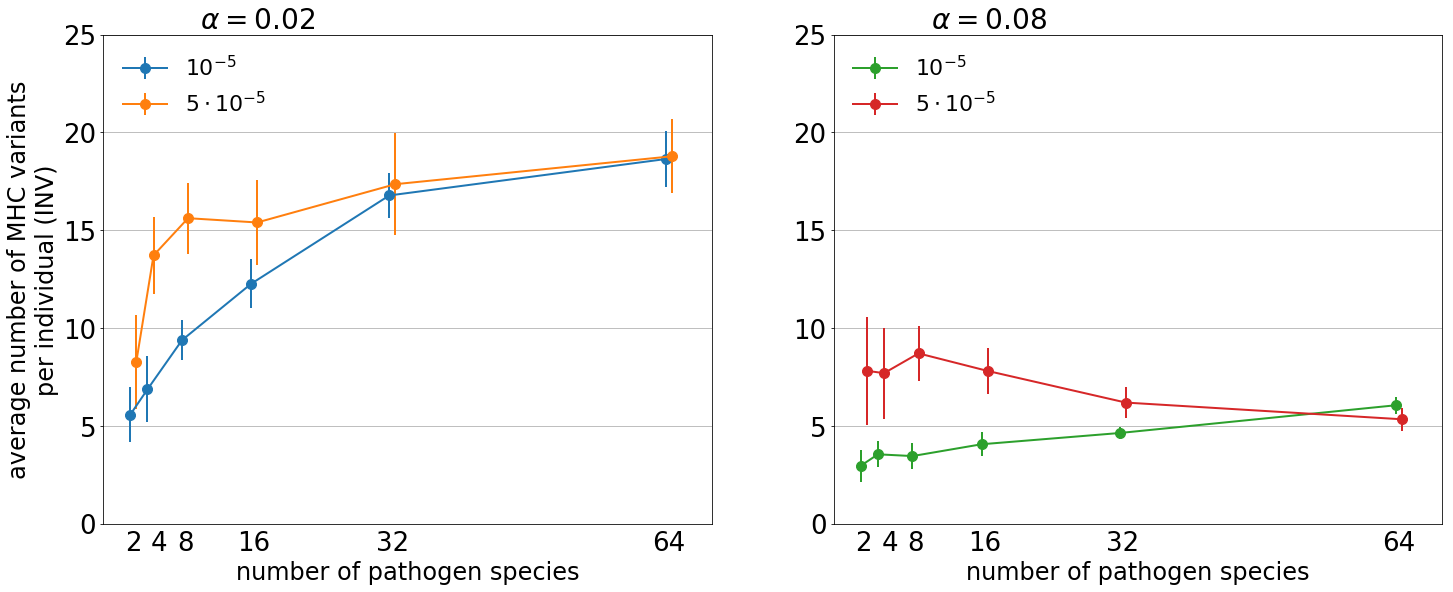

In [7]:
y_Label = "average number of MHC variants\nper individual (INV)"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, ('indvMean', 'indvSTD'), 1, 25, 1., 'upper left')
plt.show()

In [21]:
def plotAvgMHCsInIndiv(meanResult, x_label, y_label, indx=('meanAllel', 'stdAllel'), figNumb=1, 
                       yLim=25, yScale=1., legdLoc=('upper left', 'upper left'), logsc='linear'):
    """Uses the array generated by buildStats() function and plots a fancy plot
    of averaged data."""
    FS = 24
    titleFS = FS+4
    figSize = (24, 9)
    annoSize = int(1.1*FS)
    lineForRecomb = '-'
    xtix = ("", "", "2", "", "", "4", "", "", "8", "", "", "", "", "", "", "",
            "16", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "32", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "64", "", "", "", "", "", "")
    k = (-0.35, 0.35, 0.7, -0.7)
    legd = (r'   $10^{-5}$ point mut.', r'$5\cdot10^{-5}$ point mut.', 
            r'   $10^{-5}$ recombin.', r'$5\cdot10^{-5}$ recombin.')
    clr = ('C0', 'C1', 'C2', 'C3', 'C4', 'C5')
    one = 0.6
    two = 0.7
    clrPoint = ( (one, one, one, 0.75),  (two, two, two, 0.75))
    markr = ("o", "x")
    # One
    ll = []
    for itm in meanResult[0]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.figure(1, figsize=figSize)
    plt.subplot(121)
    for i, var in enumerate(ll):
        ww = meanResult[0][meanResult[0]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker=markr[i], ms=10,
                     color=clrPoint[i], label=legd[i])
    for i, var in enumerate(ll):
        ww = meanResult[2][meanResult[2]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i+2], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker=markr[i], 
                     linestyle=lineForRecomb, ms=10, color=clr[i], label=legd[i+2])
    plt.title(r'           $\alpha = 0.02$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    plt.ylabel(str(y_label), fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc[0], fontsize=FS-2)
    # Two
    ll = []
    for itm in meanResult[1]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.subplot(122)
    for i, var in enumerate(ll):
        ww = meanResult[1][meanResult[1]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker=markr[i], 
                     ms=10, color=clrPoint[i], label=legd[i])
    for i, var in enumerate(ll):
        ww = meanResult[3][meanResult[3]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i+2], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker=markr[i], 
                     linestyle=lineForRecomb, ms=10, color=clr[i+2], label=legd[i+2])
    plt.title(r'           $\alpha = 0.08$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    #plt.ylabel("average number of MHC copies\nin an individual",
    #           fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc[1], fontsize=FS-2)
    #plt.tight_layout(True)
    
   
    
    figPDF ="fig_" + str(figNumb) + "_B.pdf"
    figPNG = "fig_" + str(figNumb) + "_B.png"
    plt.savefig(figPDF, bbox_inches='tight')
    plt.savefig(figPNG, bbox_inches='tight')

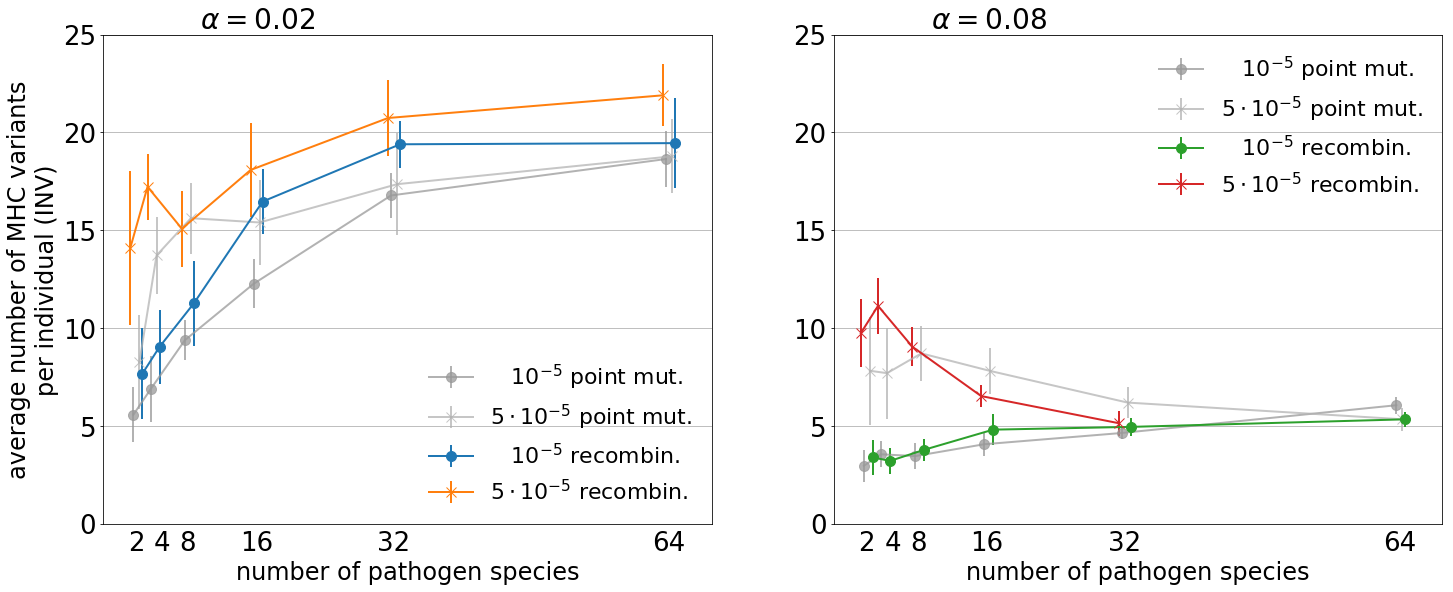

In [23]:
y_Label = "average number of MHC variants\nper individual (INV)"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, ('indvMean', 'indvSTD'), "SX", 25, 1., 
                   ('lower right', 'upper right'))
plt.show()

In [10]:
yTikzDef=np.arange(0, 200, 25)
def plotAvgMHCsInIndiv(meanResult, x_label, y_label, indx=('meanAllel', 'stdAllel'), figNumb=1, 
                       yLim=25, yScale=1., yTikz=yTikzDef, legdLoc='upper left', logsc='linear'):
    """Uses the array generated by buildStats() function and plots a fancy plot
    of averaged data."""
    FS = 24
    titleFS = FS+4
    figSize = (24, 9)
    annoSize = int(1.1*FS)
    xtix = ("", "", "2", "", "", "4", "", "", "8", "", "", "", "", "", "", "",
            "16", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "32", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "", "", "", "", "", "", "", "", "", "", "", "", "", "", "", "",
            "64", "", "", "", "", "", "")
    k = (-0.35, 0.35)
    legd = (r'$10^{-5}$', r'$5\cdot10^{-5}$')
    clr = ('C0', 'C1', 'C2', 'C3', 'C4', 'C5')
    # One
    ll = []
    for itm in meanResult[0]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.figure(1, figsize=figSize)
    plt.subplot(121)
    for i, var in enumerate(ll):
        ww = meanResult[0][meanResult[0]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker='o', ms=10,
                     color=clr[i], label=legd[i])
    plt.title(r'           $\alpha = 0.02$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    plt.ylabel(str(y_label), fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.yticks(yTikz)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    # Two
    ll = []
    for itm in meanResult[1]:
        if itm[0] in ll:
            pass
        else:
            ll.append(itm[0])
    # Second plot - unique MHC alleles in one chromosome
    plt.subplot(122)
    for i, var in enumerate(ll):
        ww = meanResult[1][meanResult[1]['VAR'] == var]
        plt.errorbar(ww['VARX']+k[i], ww[indx[0]]*yScale, ww[indx[1]]*yScale, lw=2, marker="o", 
                     ms=10, color=clr[i+2], label=legd[i])
    #plt.annotate(r'$\alpha = 0.08$', xy=(2, 27), size=annoSize)
    plt.title(r'           $\alpha = 0.08$', fontsize=titleFS, loc='left')
    plt.xlabel(str(x_label), fontsize=FS)
    #plt.ylabel("average number of MHC copies\nin an individual",
    #           fontsize=FS)
    plt.ylim((0, yLim*yScale))
    plt.xscale(logsc)
    plt.tick_params(axis='both', labelsize=annoSize, bottom=False)
    plt.xticks(np.arange(70), xtix, fontsize=FS+2)
    plt.yticks(yTikz)
    plt.grid(axis='y')
    plt.legend(frameon=False, loc=legdLoc, fontsize=FS-2)
    #plt.tight_layout(True)
    figPDF ="fig_" + str(figNumb) + ".pdf"
    figPNG = "fig_" + str(figNumb) + ".png"
    plt.savefig(figPDF, bbox_inches='tight')
    plt.savefig(figPNG, bbox_inches='tight')

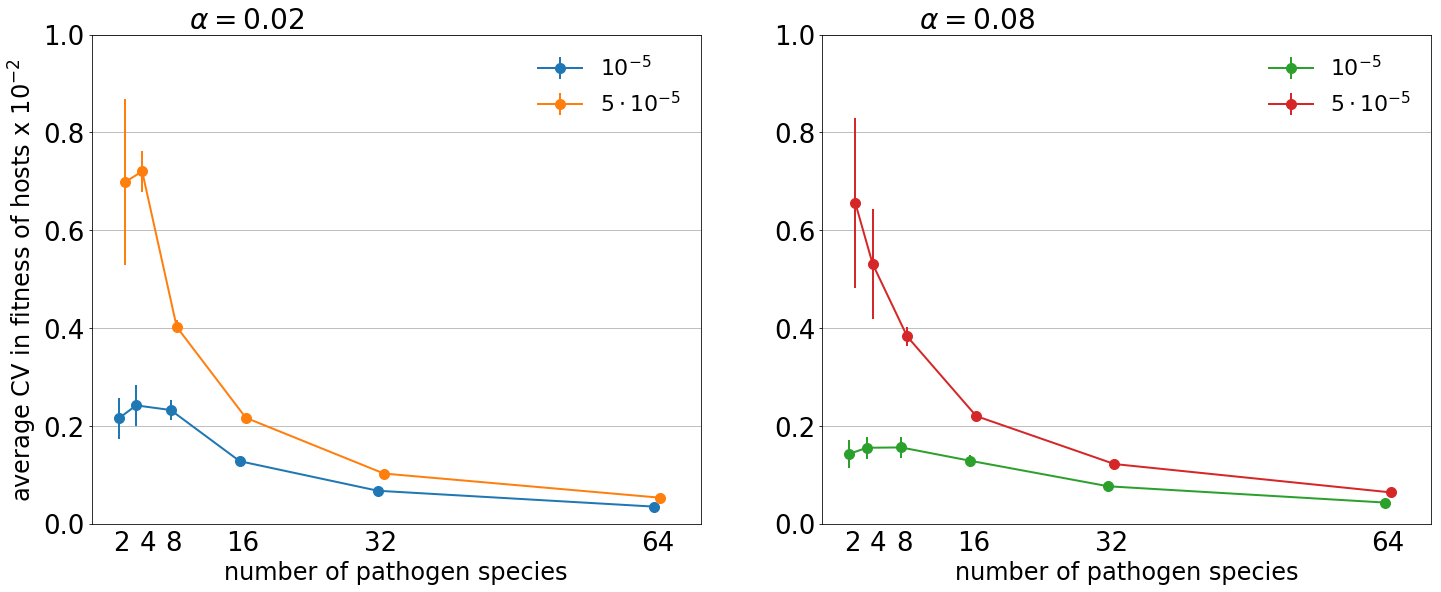

In [11]:
yTikz = np.arange(0, 1.01, 0.2)
y_Label = "average CV in fitness of hosts x $10^{-2}$"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, ('cvFitMean', 'cvFitSTD'), 2, 0.01, 100.,
                   yTikz, 'upper right')
plt.show()

In [19]:
def plotDotMeans(theData_002,theData_008):
    """Plots number of MHC alleles in population vs average number of MHC in
    one chromosome."""
#    clrs = ['bo', 'go', 'ro', 'co', 'mo']  # , 'yo'  , 'ko', 'wo']
    clrs = ['bo', 'go', 'ro', 'co', 'mo', 'yo']
    clrs += ['bv', 'gv', 'rv', 'cv', 'mv', 'yv', 'kv', 'wv']
    clrs += ['bo', 'go', 'ro', 'co', 'mo', 'yo', 'ko', 'wo']
    muts = {1e-5: "$10^{-5}$", 5e-5: "$5\cdot10^{-5}$"}
    FS = 24
    titleFS = FS+4
    figSize = (24, 10)
    annoSize = int(1*FS)
    ll = []
    comp = []
    for itm in theData_002:
        mts = (muts[itm['VAR']], int(itm['VARX']))
        if (itm['VAR'], itm['VARX']) in ll:
            pass
        else:
            ll.append((itm['VAR'], itm['VARX']))
            comp.append(mts)
    plt.figure(5, figsize=figSize)
    plt.subplot(121)
    k = 0
    for ii, var in enumerate(ll):
        ww = theData_002[theData_002['VAR'] == var[0]]
        ww = ww[ww['VARX'] == var[1]]
        lbl = str(comp[ii][0]) + " ; " + str(comp[ii][1])
        plt.plot(ww['indvMean'], ww['meanAllel'], clrs[k], ms=8, label=lbl)
        k += 1
    plt.legend(loc='upper left',bbox_to_anchor=(0.11, -0.12), 
               numpoints=1, ncol=6, fontsize=20, frameon=False)
    plt.ylabel("mean number of MHC variants in population (PNV)",fontsize=FS)
    plt.xlabel("mean number of MHC variants in one chromosome", fontsize=FS)
    plt.title(r'           $\alpha = 0.02$', fontsize=titleFS, loc='left')
    plt.xlim(left=0)
    plt.xlim(right=30)
    plt.ylim(bottom=0)
    plt.tick_params(axis='both', labelsize=annoSize)
    plt.grid(True)
    # Second set of data
    plt.subplot(122)
    k = 0
    for var in ll:
        ww = theData_008[theData_008['VAR'] == var[0]]
        ww = ww[ww['VARX'] == var[1]]
        plt.plot(ww['indvMean'], ww['meanAllel'], clrs[k], ms=8)
        k += 1
    #plt.ylabel("mean number of MHC alleles in population",
    #           fontsize=FS)
    plt.xlabel("mean number of MHC alleles in one chromosome", fontsize=FS)
    plt.title(r'           $\alpha = 0.08$', fontsize=titleFS, loc='left')
    plt.xlim(left=0)
    plt.xlim(right=30)
    plt.ylim(bottom=0)
    plt.tick_params(axis='both', labelsize=annoSize)
    plt.grid(True)
    plt.savefig("fig_S5.png", bbox_inches='tight')
    plt.savefig("fig_S5.pdf", bbox_inches='tight')

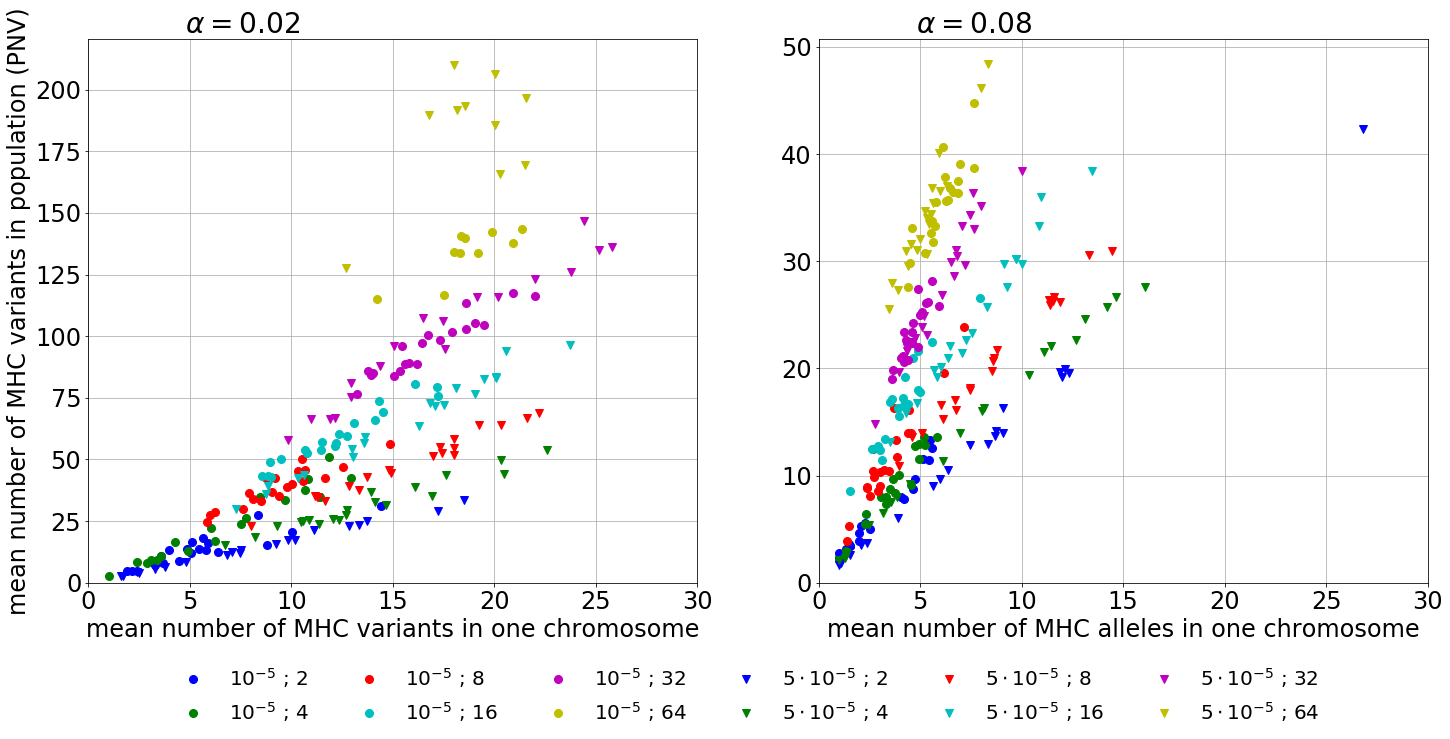

In [20]:
plotDotMeans(theData_002, theData_008)
plt.show()

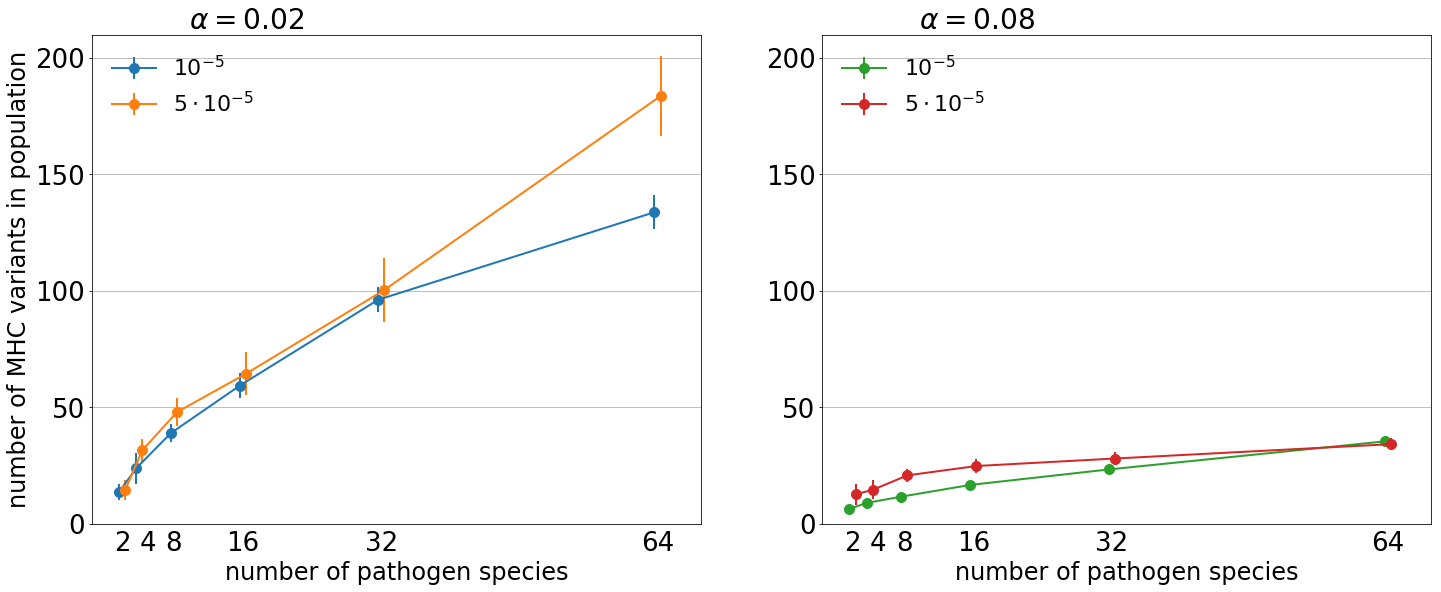

In [18]:
yTikz = np.arange(0, 211, 50)
y_Label = "number of MHC variants in population"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, ('meanAllel', 'stdAllel'), 
                   '4', 210, 1., yTikz, 'upper left')
plt.show()

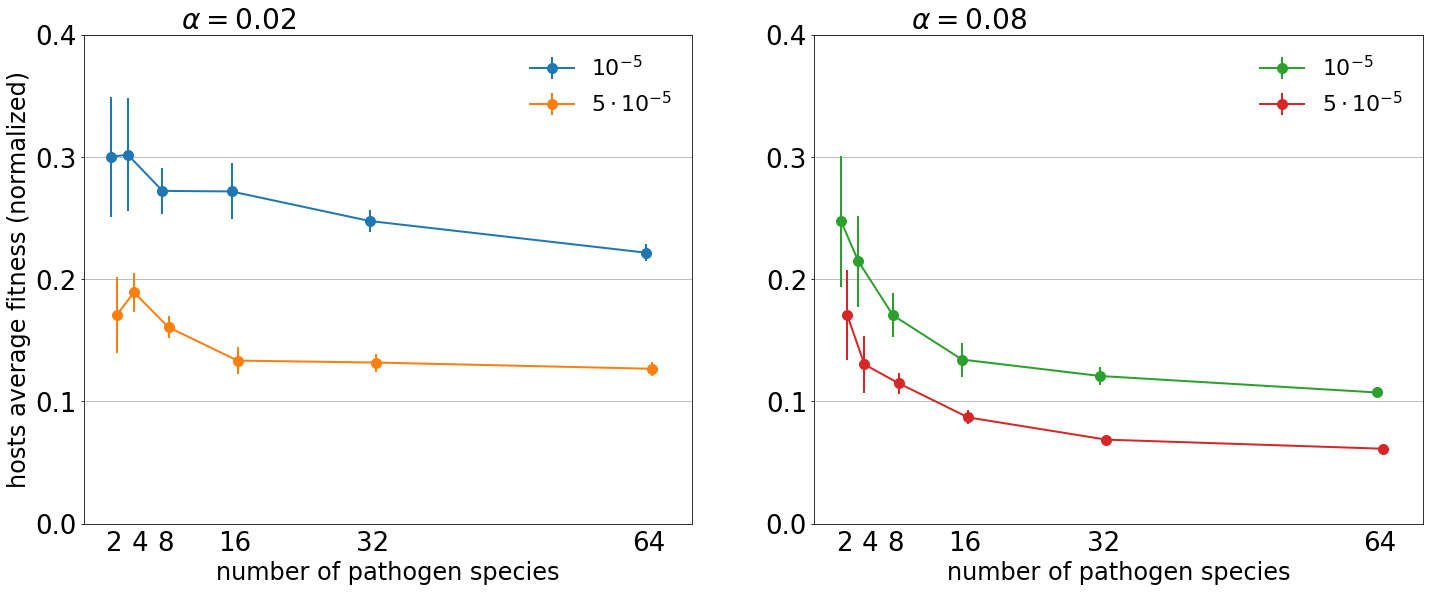

In [15]:
yTikz = np.arange(0, 0.401, 0.1)
y_Label = "hosts average fitness (normalized)"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, ('meanFitt', 'stdFitt'), 'SXX', 0.2,
                   1., yTikz, 'upper right')
plt.show()

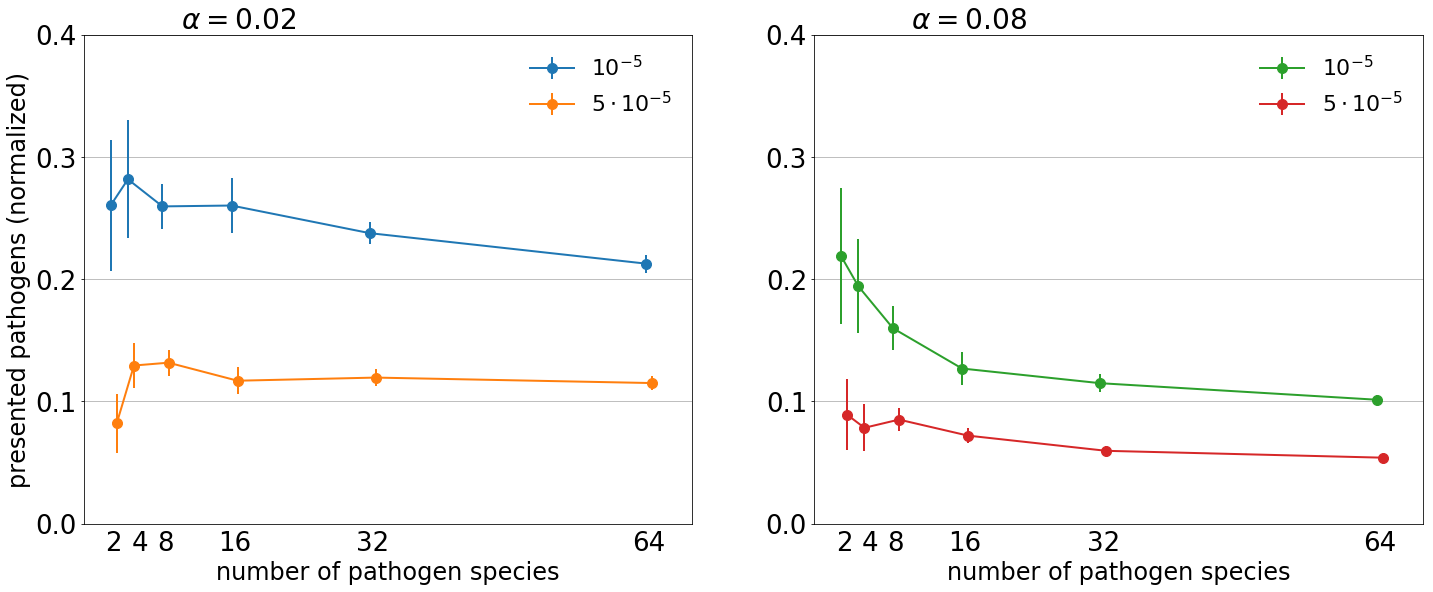

In [16]:
yTikz = np.arange(0, 0.401, 0.1)
y_Label = "presented pathogens (normalized)"
plotAvgMHCsInIndiv(meanResult, x_Label, y_Label, ('meanPato', 'stdPato'), 'SXXX', 0.2,
                   1., yTikz, 'upper right')
plt.show()

In [17]:
plt.errorbar??

Signature:
plt.errorbar(
    x,
    y,
    yerr=None,
    xerr=None,
    fmt='',
    ecolor=None,
    elinewidth=None,
    capsize=None,
    barsabove=False,
    lolims=False,
    uplims=False,
    xlolims=False,
    xuplims=False,
    errorevery=1,
    capthick=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

Parameters
----------
x, y : scalar or array-like
    The data positions.

xerr, yerr : scalar or array-like, shape(N,) or shape(2,N), optional
    The errorbar sizes:

    - scalar: Symmetric +/- values for all data points.
    - shape(N,): Symmetric +/-values for each data point.
    - shape(2,N): Separate - and + values for each bar. First row
        contains the lower errors, the second row contains t